# Optimization Using scipy
[SciPy](https://scipy.org/)

Fundamental algorithms for scientific computing in Python

The `scipy.optimize` package provides several commonly used optimization algorithms. 

To learn how to use a python package, there are two ways
1. Read the API reference, where you can find all inputs, parameters, and outputs. However, for a beginner, there will be too many details.
[scipy.optimize API](https://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize)
2. Follow the tutotials, where the concrete examples are provided.
[scipy tutorials](https://docs.scipy.org/doc/scipy/tutorial/optimize.html#optimization-scipy-optimize)

Content
- Direct Method
- Conjugate Gradient
- Quasi-Newton

## Direct Method: Nelder-Mead Method

Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 44
         Function evaluations: 83
Optimal solution: [-3.94645289e-06 -1.88477704e-05]
Trajectory of optimization steps:
Step 1: [0.5 1.5]
Step 2: [0.5375 1.35  ]
Step 3: [0.50625 1.275  ]
Step 4: [0.565625 0.9375  ]
Step 5: [0.5328125 0.61875  ]
Step 6: [ 0.63515625 -0.215625  ]
Step 7: [ 0.63515625 -0.215625  ]
Step 8: [0.57578125 0.121875  ]
Step 9: [0.57578125 0.121875  ]
Step 10: [0.57578125 0.121875  ]
Step 11: [ 0.58203125 -0.103125  ]
Step 12: [0.51015625 0.084375  ]
Step 13: [0.51015625 0.084375  ]
Step 14: [0.37578125 0.121875  ]
Step 15: [0.37578125 0.121875  ]
Step 16: [ 0.26289063 -0.0140625 ]
Step 17: [0.15898438 0.1265625 ]
Step 18: [ 0.04609375 -0.009375  ]
Step 19: [ 0.04609375 -0.009375  ]
Step 20: [ 0.04609375 -0.009375  ]
Step 21: [ 0.04609375 -0.009375  ]
Step 22: [ 0.04609375 -0.009375  ]
Step 23: [ 0.04609375 -0.009375  ]
Step 24: [-0.02857056 -0.01208496]
Step

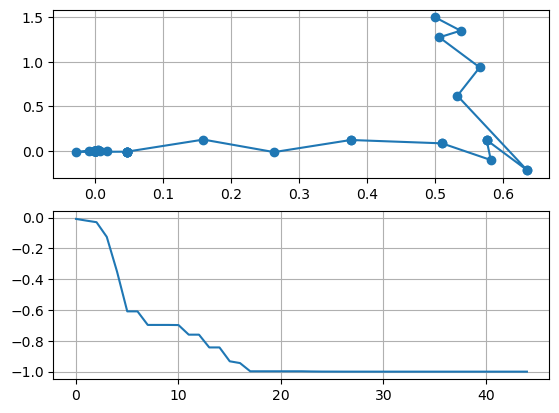

In [2]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return - np.exp(-x[0]**2 - 2 * x[1]**2) 

# Initial guess
x0 = np.array([0.5, 1.5])

# array to store the progress
progress = [x0]
progress_val = [f(x0)]

# callback during optimization
def cb(x):
    progress.append(x)
    progress_val.append(f(x))

# Minimize the function using the CG method
result = minimize(f, x0, method='nelder-mead', options={'disp': True},callback=cb)

# Retrieve the optimal solution
optimal_solution = result.x
# Print the results
print("Optimal solution:", optimal_solution)
print("Trajectory of optimization steps:")
for step, position in enumerate(progress):
    print(f"Step {step + 1}: {position}")
    
##
progress = np.array(progress)
progress_val = np.array(progress_val)
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
ax.plot(progress[:, 0], progress[:, 1],marker='o')
ax.grid()
ax = fig.add_subplot(2,1,2)
ax.plot(progress_val)
ax.grid()
plt.show()

## Conjuate Gradient Methods

Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 7
         Function evaluations: 17
         Gradient evaluations: 17
Optimal solution: [ 1.16355513e-12 -4.31602299e-12]
Trajectory of optimization steps:
Step 1: [0.5 1.5]
Step 2: [ 0.24654521 -0.02072874]
Step 3: [ 0.12817706 -0.10004636]
Step 4: [ 0.03351567 -0.0363442 ]
Step 5: [0.01509969 0.00359617]
Step 6: [-5.3922784e-05  1.1846254e-04]
Step 7: [-2.62807314e-05 -2.99067588e-06]
Step 8: [ 1.16355513e-12 -4.31602299e-12]


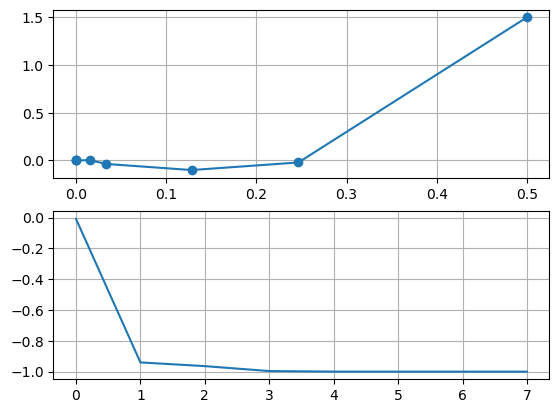

In [3]:
import numpy as np
from scipy.optimize import minimize

# Define function
def f(x):
    return - np.exp(-x[0]**2 - 2 * x[1]**2) 

def df(x):
    fv = np.exp(-x[0]**2 - x[1]**2) 
    return [2 * x[0] *fv, 4 *x[1] * fv]

# Initial guess
x0 = np.array([0.5, 1.5])

# array to store the progress
progress = [x0]
progress_val = [f(x0)]
# callback during optimization
def cb(x):
    progress.append(x)
    progress_val.append(f(x))

# Minimize the function using the CG method
result = minimize(f, x0,  method='CG', jac=df,
               options={'disp': True},callback =cb)

# Retrieve the optimal solution
optimal_solution = result.x
# Print the results
print("Optimal solution:", optimal_solution)
print("Trajectory of optimization steps:")
for step, position in enumerate(progress):
    print(f"Step {step + 1}: {position}")
    
##
progress = np.array(progress)
progress_val = np.array(progress_val)
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
ax.plot(progress[:, 0], progress[:, 1],marker='o')
ax.grid()
ax = fig.add_subplot(2,1,2)
ax.plot(progress_val)
ax.grid()
plt.show()

## Quasi-Newton Method

Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 6
         Function evaluations: 12
         Gradient evaluations: 12
Optimal solution: [1.05271035e-06 3.36218455e-07]
Trajectory of optimization steps:
Step 1: [0.5 1.5]
Step 2: [ 0.24654521 -0.02072874]
Step 3: [ 0.12744791 -0.10000876]
Step 4: [ 0.03354067 -0.03447423]
Step 5: [-0.00093008  0.0014216 ]
Step 6: [-1.48451244e-05 -1.12907255e-05]
Step 7: [1.05271035e-06 3.36218455e-07]


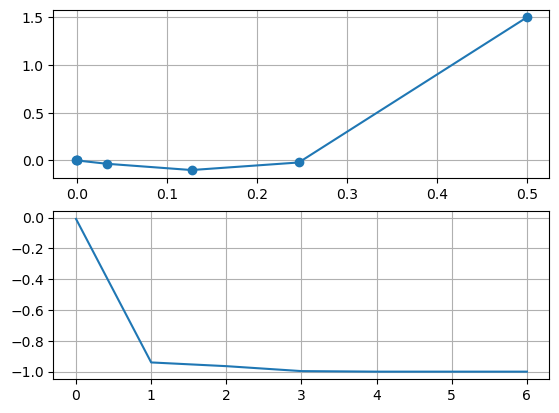

In [4]:
import numpy as np
from scipy.optimize import minimize

# Define function
def f(x):
    return - np.exp(-x[0]**2 - 2 * x[1]**2) 

def df(x):
    fv = np.exp(-x[0]**2 - x[1]**2) 
    return [2 * x[0] *fv, 4 *x[1] * fv]

# Initial guess
x0 = np.array([0.5, 1.5])

# array to store the progress
progress = [x0]
progress_val = [f(x0)]
# callback during optimization
def cb(x):
    progress.append(x)
    progress_val.append(f(x))

# Minimize the  function using the Broyden-Fletcher-Goldfarb-Shanno algorithm 
result = minimize(f, x0,  method='BFGS', jac=df,
               options={'disp': True},callback =cb)

# Retrieve the optimal solution
optimal_solution = result.x
# Print the results
print("Optimal solution:", optimal_solution)
print("Trajectory of optimization steps:")
for step, position in enumerate(progress):
    print(f"Step {step + 1}: {position}")
    
##
progress = np.array(progress)
progress_val = np.array(progress_val)
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
ax.plot(progress[:, 0], progress[:, 1],marker='o')
ax.grid()
ax = fig.add_subplot(2,1,2)
ax.plot(progress_val)
ax.grid()
plt.show()

## Conjugate-Newton Method

Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 5
         Function evaluations: 10
         Gradient evaluations: 10
         Hessian evaluations: 5
Optimal solution: [-2.64591917e-19  3.65150610e-20]
Trajectory of optimization steps:
Step 1: [0.5 1.5]
Step 2: [0.25713598 0.04281589]
Step 3: [-0.01270176 -0.04704584]
Step 4: [-0.00623471  0.00086055]
Step 5: [ 5.03215776e-07 -6.94565465e-08]
Step 6: [-2.64591917e-19  3.65150610e-20]


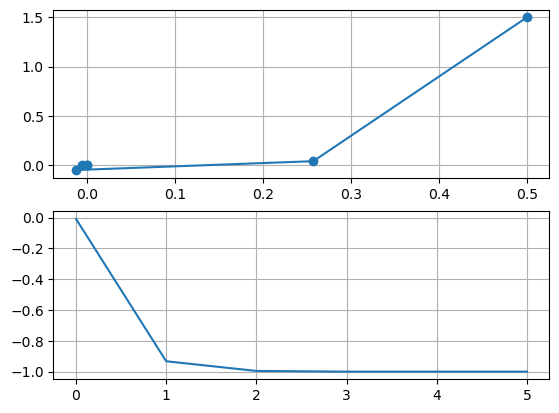

In [5]:
import numpy as np
from scipy.optimize import minimize

# Define function
def f(x):
    return - np.exp(-x[0]**2 - 2 * x[1]**2) 

def df(x):
    fv = -np.exp(-x[0]**2 - x[1]**2) 
    return [-2 * x[0] *fv, -4 *x[1] * fv]
def f_hess(x):
    fv = - np.exp(-x[0]**2 - x[1]**2) 
    H = np.zeros([2,2])
    H[0,0] = -2 * fv  + 4 * x[0]**2 * fv
    H[0,1] = 8 * x[0] * x[1] *fv
    H[1,0] = H[0,1]
    H[1,1] = -4 * fv  + 16 * x[1]**2 * fv
    return H

# Initial guess
x0 = np.array([0.5, 1.5])

# array to store the progress
progress = [x0]
progress_val = [f(x0)]
# callback during optimization
def cb(x):
    progress.append(x)
    progress_val.append(f(x))

# Minimize the  function using the Broyden-Fletcher-Goldfarb-Shanno algorithm 
result = minimize(f, x0,  method='Newton-CG', jac=df,hess=f_hess,
               options={'disp': True},callback =cb)

# Retrieve the optimal solution
optimal_solution = result.x
# Print the results
print("Optimal solution:", optimal_solution)
print("Trajectory of optimization steps:")
for step, position in enumerate(progress):
    print(f"Step {step + 1}: {position}")
    
##
progress = np.array(progress)
progress_val = np.array(progress_val)
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
ax.plot(progress[:, 0], progress[:, 1],marker='o')
ax.grid()
ax = fig.add_subplot(2,1,2)
ax.plot(progress_val)
ax.grid()
plt.show()

Exercise 1 Find the minimizer and minimum of $ f(x,y) = e^{-x^2 - 2 y^2} + e^{-2 (x-1)^2 -  (y-1)^2}$ for $x \in (-2,2)$ and $y \in (-2,2)$ 